## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn import linear_model
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## ****Import Data****

In [2]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv' , sep = "," , encoding = 'utf-8')

## **EDA**

In [3]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We have a lot of outliers

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Correlation between columns

<AxesSubplot:>

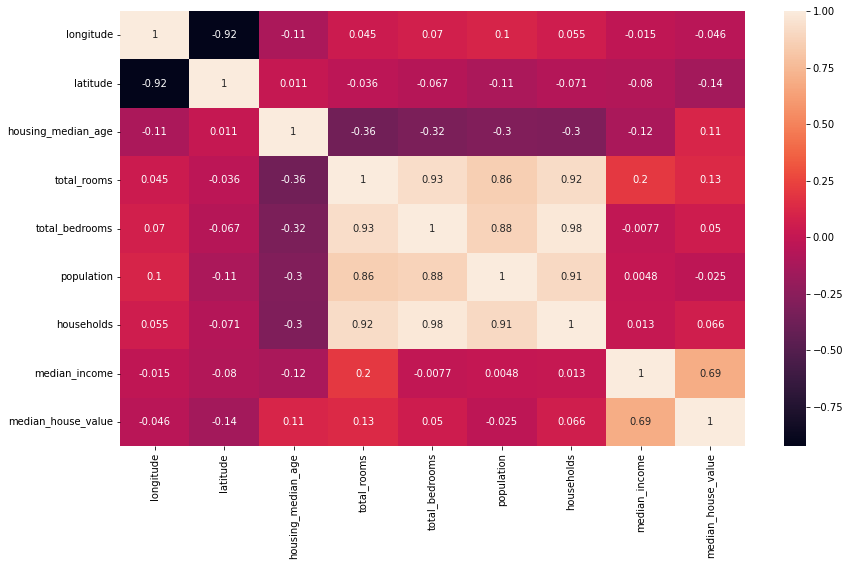

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(housing.corr(),annot=True)

## **Missing data**

<AxesSubplot:>

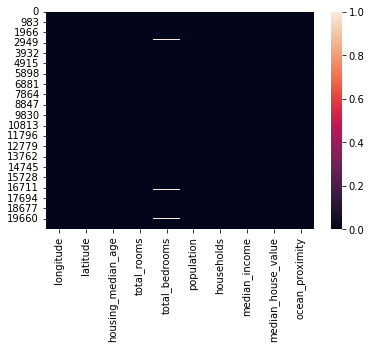

In [9]:
sns.heatmap(housing.isnull())

## **Drop Missing**

In [10]:
y = housing.dropna(thresh = 10)
y

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:>

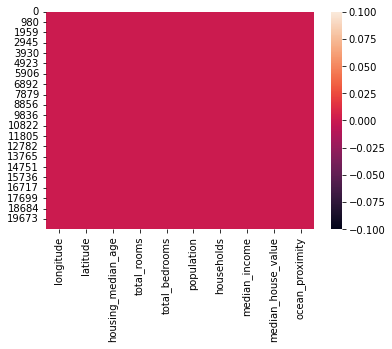

In [11]:
sns.heatmap(y.isnull())

In [12]:
y.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

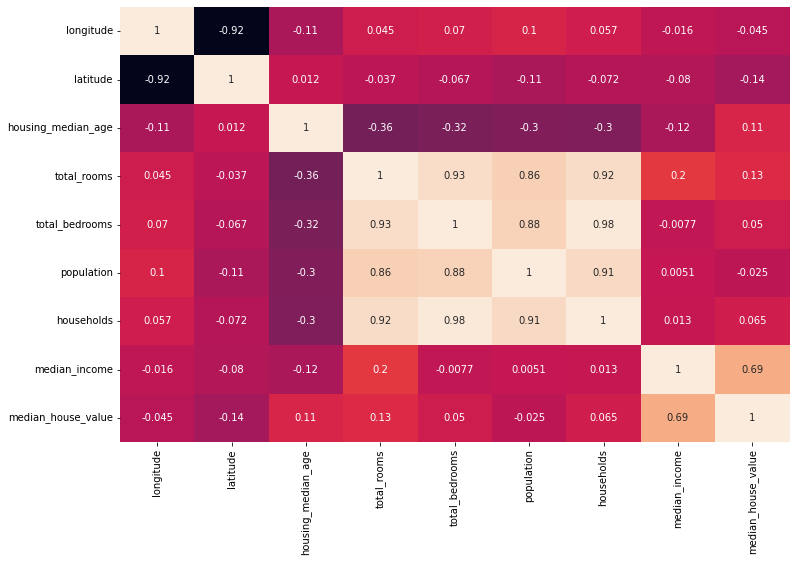

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(y.corr() , annot = True , cbar=False)

In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## **Drop null values**

In [15]:
y = y.dropna(subset=['housing_median_age', "population", 'households' ])

In [16]:
y.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

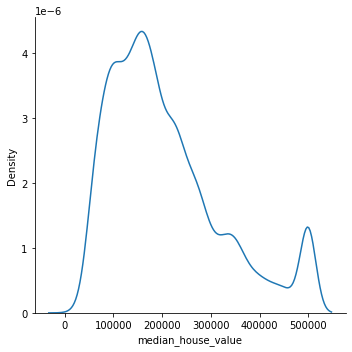

In [17]:
sns.displot(housing, x = "median_house_value", kind="kde")

In [18]:
y = housing.dropna()

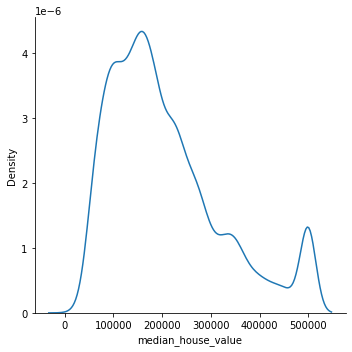

In [19]:
sns.displot(housing, x = "median_house_value", kind="kde")

In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


**We dropped 207 Row**

## **Fill missing value**

##  Mean Fill total_bedrooms

In [21]:
y['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [22]:
bedrooms_mean =round(y['total_bedrooms'].mean())
bedrooms_mean

538

In [23]:
temp = y['total_bedrooms'].fillna(bedrooms_mean)
temp

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20433, dtype: float64

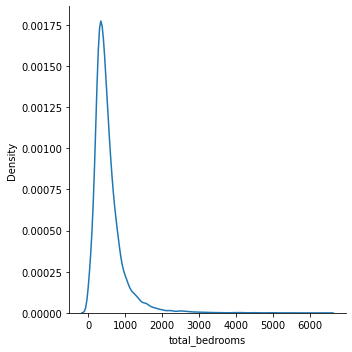

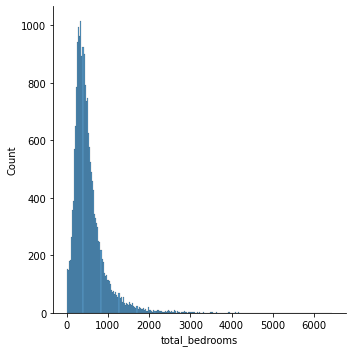

In [24]:
sns.displot(temp, x = temp, kind="kde")
sns.displot(housing, x = "total_bedrooms", kde=False)

In [25]:
fill_list = housing['total_bedrooms'].dropna()
y['total_bedrooms'] = y['total_bedrooms'].fillna(pd.Series(np.random.choice(fill_list , size = len(y.index))))

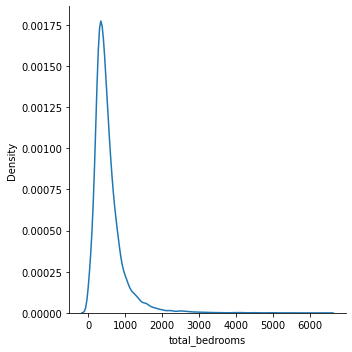

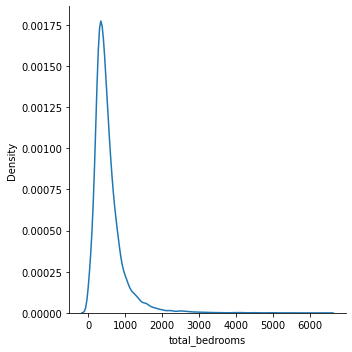

In [26]:
sns.displot(y, x = "total_bedrooms", kind="kde")
sns.displot(housing, x = "total_bedrooms", kind="kde")

**We Can notice that Random Choice Fill is better here**

<AxesSubplot:>

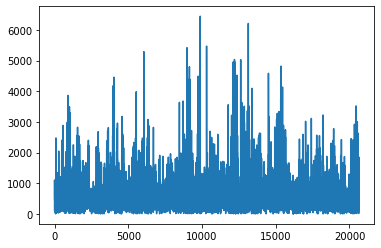

In [27]:
y.total_bedrooms.plot.line()

In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.2+ MB


In [29]:
# missing value filled
y.duplicated().sum()

0

## **Outliers**

Total Bedrooms

In [30]:
fig = px.scatter(x= y['total_bedrooms'] , y = y['median_house_value'],color=y['total_bedrooms'])
fig.show()

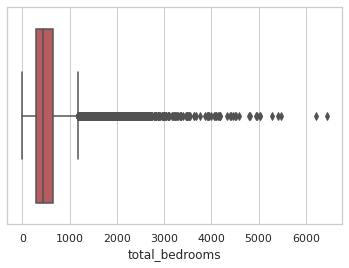

In [31]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=y['total_bedrooms'],color='r')

In [32]:
fig = px.scatter(x= y['total_bedrooms'] , y = y['median_house_value'])
fig.show()

# Population

In [33]:
fig = px.scatter(x= y['population'] , y = y['median_house_value'],color=y['population'])
fig.show()

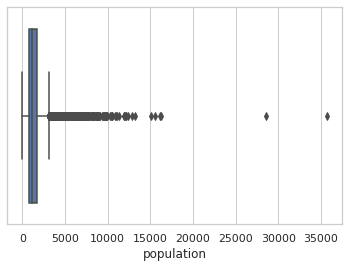

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=y['population'],color='b')

In [35]:
fig = px.scatter(x= y['population'] , y = y['median_house_value'])
fig.show()

## **Label Encoding**

In [36]:
y

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
ln = LabelEncoder()

In [38]:
ocean_ln = LabelEncoder()
gender_ln = LabelEncoder()

In [39]:
y['ocean_proximity'] = ocean_ln.fit_transform(y['ocean_proximity'])

In [40]:
y

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [41]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.2 MB


## **plot a histogram for each numerical attribute**

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'ocean_proximity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

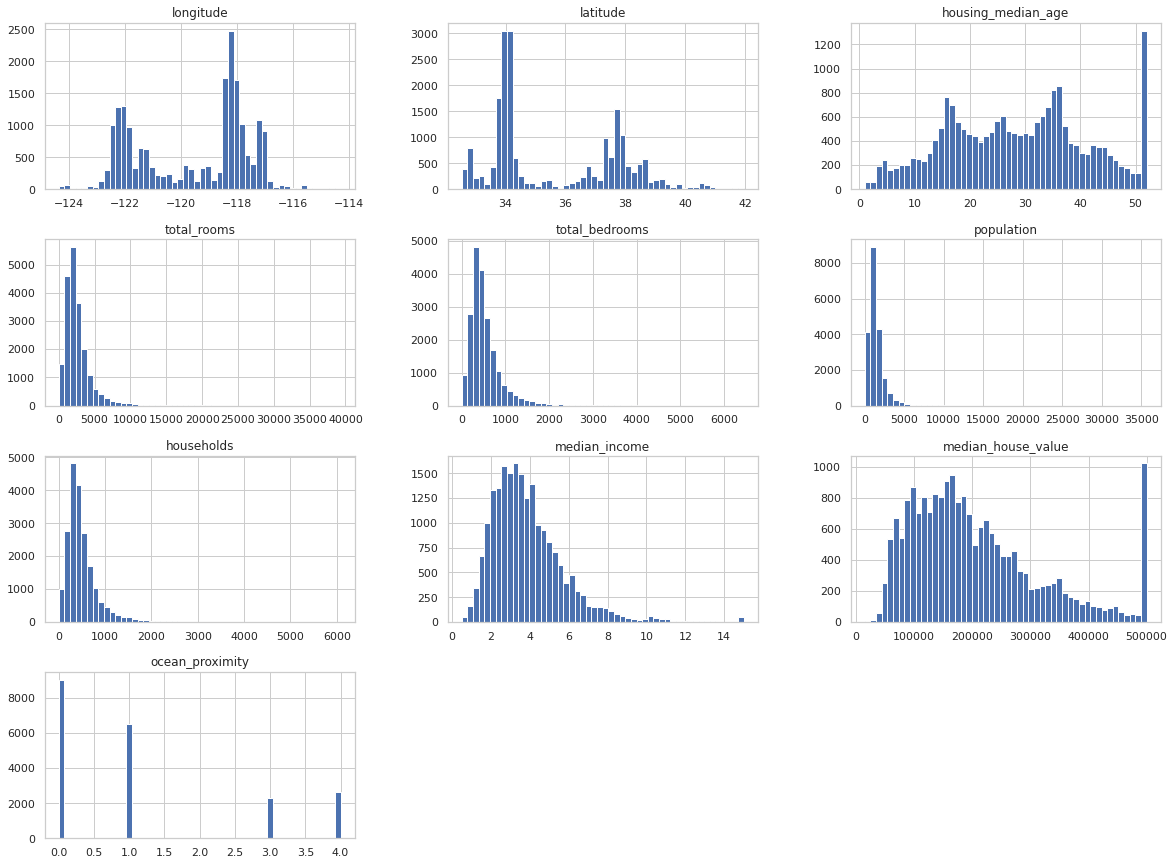

In [42]:
y.hist(bins=50, figsize=(20,15))

## **Dealing with Outliers using (IQR)**

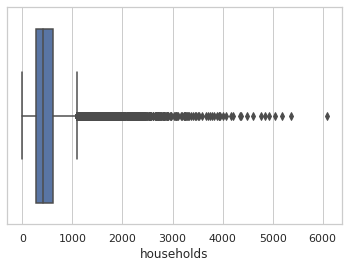

In [43]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=y["households"])

In [44]:
def remove_outlier(column):
    p25 = column.describe()[4]
    p75 = column.describe()[6]
    IQR = p75 - p25
    l = p75 + 1.5*IQR
    u = p25 - 1.5*IQR
    column.mask(column>l,l,inplace=True)
    column.mask(column< u, u,inplace=True)

In [45]:
for col in y:
    if col!='median_house_value':
        remove_outlier(y[col])

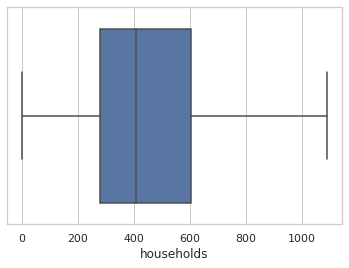

In [46]:
ax = sns.boxplot(x=y["households"])

## **Modeling**

<AxesSubplot:>

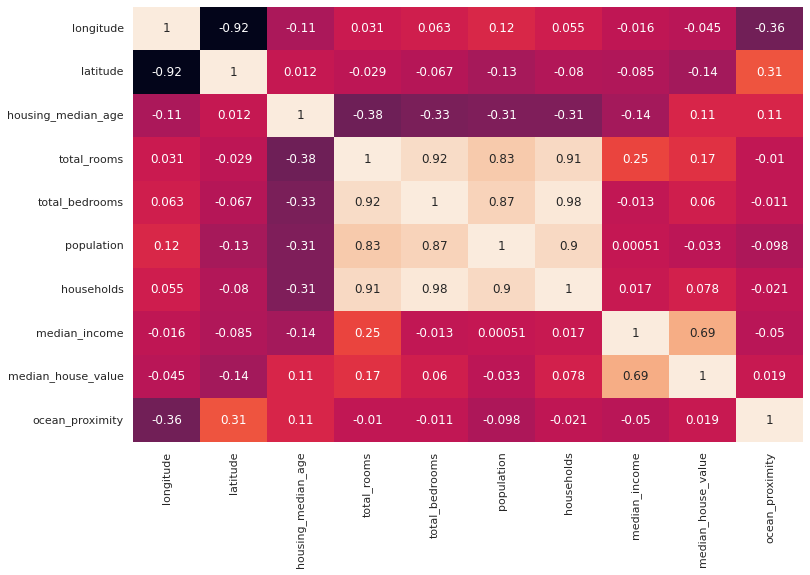

In [47]:
plt.figure(figsize = (12,8))
sns.heatmap(y.corr() , annot = True , cbar=False)

In [48]:
y.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [49]:
y = y[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]

In [50]:
x = y.drop(['median_house_value'] , axis = 1).values
y= y['median_house_value' ].values

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [52]:
x_train.shape

(15324, 9)

In [53]:
y_train.shape

(15324,)

## **Scaling using Robust Scaler**

In [54]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [55]:
x_train.shape

(15324, 9)

In [56]:
x_test.shape

(5109, 9)

## **1- Linear Regression**

In [57]:
reg = linear_model.LinearRegression()

In [58]:
reg.fit(x_train , y_train)

LinearRegression()

In [59]:
reg.score(x_train , y_train)

0.6572889443355264

In [60]:
reg.score(x_test , y_test)

0.6598574803217991

In [61]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,245800.0,197277.843616
1,137900.0,169359.148806
2,218200.0,206210.461941
3,220800.0,165992.570393
4,170500.0,244042.445684
5,75000.0,94890.340511
6,269400.0,296042.687527
7,228900.0,260699.850493
8,500001.0,421106.463719
9,80800.0,47858.180606


In [62]:
# R square
reg_score = r2_score(y_test , y_pred)
reg_score

0.6598574803217991

In [63]:
# R square
reg_score = r2_score(y_test , y_pred)
reg_score

0.6598574803217991

In [64]:
# Adjusted R square
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.6596575794025681

In [65]:
adj_R2< reg_score

True

In [66]:
ms = mean_squared_error(y_test , y_pred)
ms

4601728818.522188

In [67]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.3025567513634855

In [68]:
mae = mean_absolute_error(y_test , y_pred)
mae

50637.72451507771

In [69]:
reg_mse = mean_squared_error(y_test , y_pred)
reg_rmse  = np.sqrt(reg_mse)
reg_rmse

67836.04365322457

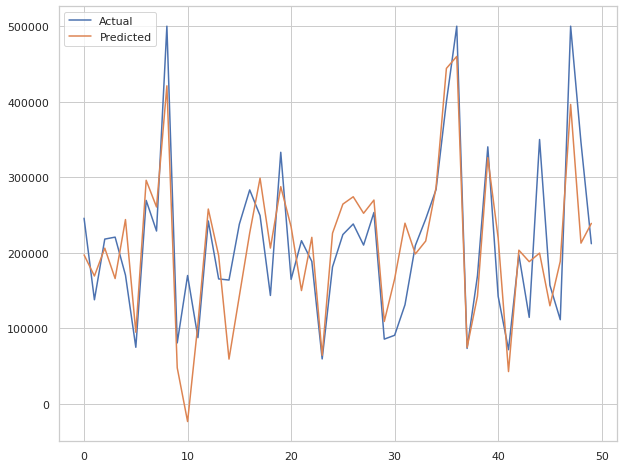

In [70]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

## **2- Ridge regression**

In [71]:
reg = linear_model.Ridge(alpha=0.9)

In [72]:
reg.fit(x_train , y_train)

Ridge(alpha=0.9)

In [73]:
reg.score(x_train , y_train)

0.6572882181864934

In [74]:
reg.score(x_test , y_test)

0.659862967388787

In [75]:
y_pred1 =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : y_pred1})
df.head(10)

,Y_test,Y_pred1
0,245800.0,197223.969306
1,137900.0,169344.950458
2,218200.0,206190.374628
3,220800.0,165918.360868
4,170500.0,243876.199468
5,75000.0,94970.175136
6,269400.0,295922.560113
7,228900.0,260714.163082
8,500001.0,421051.670673
9,80800.0,48049.438935


In [76]:
rid_score = r2_score(y_test , y_pred1)
rid_score

0.659862967388787

In [77]:
adj_R2 = 1-(1-rid_score)*(n-1)/(n-p-1)
adj_R2

0.6596630696942918

In [78]:
ms = mean_squared_error(y_test , y_pred1)
ms

4601654584.950006

In [79]:
mae = mean_absolute_error(y_test , y_pred1)
mae

50633.98034571029

In [80]:
rid_mse = mean_squared_error(y_test , y_pred1)
rid_rmse  = np.sqrt(rid_mse)
rid_rmse

67835.49649667204

In [81]:
mape = mean_absolute_percentage_error(y_test , y_pred1)
mape

0.30248109280406393

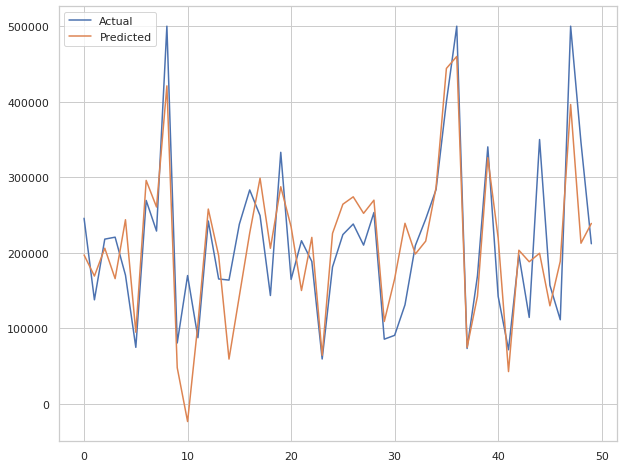

In [82]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

## **3- Lasso Regression**

In [83]:
reg = linear_model.Lasso(alpha=0.9)

In [84]:
reg.fit(x_train,y_train)

Lasso(alpha=0.9)

In [85]:
reg.score(x_train , y_train)

0.6572889342720337

In [86]:
reg.score(x_test , y_test)

0.6598577722004917

In [87]:
y_pred2 =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred2})
df.head(10)

,Y_test,Y_pred2
0,245800.0,197272.411872
1,137900.0,169368.681589
2,218200.0,206205.988614
3,220800.0,165991.643883
4,170500.0,244020.995710
5,75000.0,94899.115754
6,269400.0,296031.559073
7,228900.0,260700.906101
8,500001.0,421100.060834
9,80800.0,47874.430832


In [88]:
las_score = r2_score(y_test , y_pred2)
las_score

0.6598577722004917

In [89]:
adj_R2 = 1-(1-las_score)*(n-1)/(n-p-1)
adj_R2

0.659657871452797

In [90]:
ms = mean_squared_error(y_test , y_pred2)
ms

4601724869.746269

In [91]:
mae = mean_absolute_error(y_test , y_pred2)
mae

50637.38383445359

In [92]:
las_mse = mean_squared_error(y_test , y_pred2)
las_rmse  = np.sqrt(reg_mse)
las_rmse

67836.04365322457

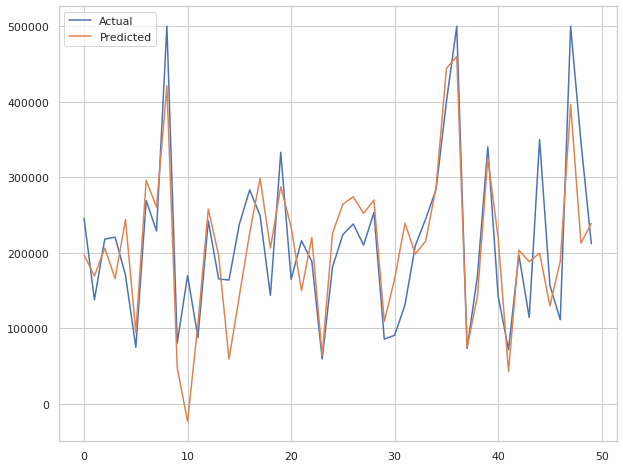

In [93]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [94]:
models = ['LinearRegression' , 'Ridge' , 'Lasso']
data = [[reg_score ,reg_rmse ] , [rid_score ,rid_rmse ] , [las_score ,las_rmse ]]
cols = ["r2_score" , "RMSE"]
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['r2_score'])

,r2_score,RMSE
Ridge,0.659863,67835.496497
Lasso,0.659858,67836.043653
LinearRegression,0.659857,67836.043653


In [95]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train , X2)
est1 = est.fit()
print (est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     3263.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:54:28   Log-Likelihood:            -1.9212e+05
No. Observations:               15324   AIC:                         3.843e+05
Df Residuals:                   15314   BIC:                         3.843e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.036e+05    732.809    277.850      0.0

* Don't miss vote for me 